# Ziel - Die Erstellung eines Machine Learning Models für die Klassifizierung verschiedenen Reviews

## Import der Bibliotheken

#### NLTK: Natural Language Processing Toolkit ist eine Python Bibliothek die wir nutzen um NLP Aufgaben wie Stemming, Lemmatisierung, Stopwords entfernen umzusetzten.

#### Porter Stemmer : Ist eine art von Stemmer. Stemming ist eine Technique die ein Wort in einem Wurzel Wort umwandelt. 

bsp für Englisch :
- learning - learn
- earning - earn


In [30]:
import re                                                       ## to use Regular expression
import pickle                                                   ## object serialization 
import nltk                                                     ## preprocessing Reviews                   
import pandas as pd                                             ## loading dataset file
import seaborn as sns                                           ## visulization
nltk.download('stopwords')                                      ## downloading stopwords
from nltk.corpus import stopwords                               ## removing all the stop words
from nltk.stem.porter import PorterStemmer                      ## stemming of words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kirsten\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Unsere Daten in einer Datei zusammenfassen

In [31]:
# with open('yelp_labelled.txt', 'r') as readfile:
#     lines = readfile.readlines()
# with open('yelp_labelled.txt', 'w') as writefile:
#     for line in lines:
#         if line.strip('\n') != 'Review	Like':
#             writefile.write(line)

# filenames = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']
# with open('dataset.txt', 'w+') as outfile:
#     outfile.write('Review	Like \n')
#     for fname in filenames:
#         with open(fname) as infile:
#             for line in infile:
#                 outfile.write(line)

## Dataset aus Datei lesen

#### Dataset wird aus einer CSV (comma separated values) gelesen. Als Separator für die Spalten im Text wird Tab verwendet

Die Datei enthält zwei Spalten: Review und Like. 

- Review: Enthält Reviews von verschiedenen Kunden
- Like: Ist eine numerische Spalte 0 bedeutet negativ und 1 bedeutet positiv

#### Dateiquelle
- https://www.kaggle.com/cipherlab/amazonyelptwittersentiment


In [33]:
header_list = ["Like", "Review"]
dataset = pd.read_csv('amazon_yelp_twitter.csv', names = header_list, nrows=50000)
#dataset = dataset.dropna()
dataset = dataset.fillna("NULL")

## EDA (exploratory data analysis) für unser Dataset

wir wollen überprüfen ob: 
- die Anzahl von Spalten richtig ist(2)
- die Namen der Spalten richtig sind (Review und Like)
- die Anzahl der Zeilen richtig ist (1000)
- die Daten enthalten keine NULL Werte
- der datentyp für die Like Spalte numerisch ist

In [34]:
print(dataset.shape);           ### Return the shape of data 
print(dataset.ndim);            ### Return the n dimensions of data
print(dataset.size);            ### Return the size of data 
print(dataset.isna().sum());    ### Returns the sum fo all na values
print(dataset.info());          ### Give concise summary of a DataFrame
print(dataset.head());          ## top 5 rows of the dataframe
print(dataset.tail());          ## bottom 5 rows of the dataframe

(50000, 2)
2
100000
Like      0
Review    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Like    50000 non-null  int64 
 1   Review  50000 non-null  object
dtypes: int64(1), object(1)
memory usage: 781.4+ KB
None
   Like                                          Review
0     1             nearly perfect wheat-free bread mix
1     0  be aware: speakers not as advertised on amazon
2     0                         results comedic at best
3     1      going to enjoy the sunshine while its here
4     1                              i feel better now.
       Like                                             Review
49995     1                                     back i think..
49996     1  viceversa? is that a weird kama sutra position...
49997     0                             low quality, low price
49998     0                  astoundingly inac

## Wir zeigen die Spalte Like in einem Graph 

#### Wir wollen sicherstellen das dieAnzahl von negativen (Like = 0) und positiven (Like = 1) Reviews gleich ist.

C:\Users\Kirsten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


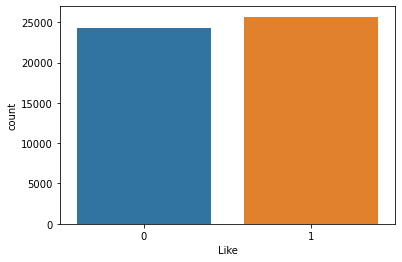

In [35]:
sns.countplot('Like', data=dataset);

## Preprocessing der Daten

### Damit wollen wir die Daten für den Maschine Learning Algorithmus vorbereiten

#### für jedes Review:

- Entfernung aller Zeichen die keine Buchstaben sind
- Konvertierung aller Buchstaben in Kleinbuchstaben
- Wir entfernen alle Stopwords (Stoppwörter). Diese sind Worte die sehr häufig auftreten und keine Relevanz für die Erfassung des Dokumentinhalts besitzen. Allgemein übliche Stoppwörter sind bestimmte Artikel, unbestimmte Artikel, Konjunktionen und häufig gebrauchte Präpositionen. Eine Ausnahme: hier entfernen wir nicht das Wort "not" weil es die Bedeutung eines Reviews ändern kann.

In [36]:
corpus = []
for i in range(0,len(dataset)):                                                     
     review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
     review = review.lower()
     review = review.split()
     pe = PorterStemmer()
     all_stopword = stopwords.words('english')
     all_stopword.remove('not')
     review = [pe.stem(word) for word in review if not word in set(all_stopword)]
     review = " ".join(review)
     corpus.append(review)
print(corpus)

['nearli perfect wheat free bread mix', 'awar speaker not advertis amazon', 'result comed best', 'go enjoy sunshin', 'feel better', 'um skullcandi head phone rock thank guy', 'god hate wait around fb', 'want love', 'eat less lose weight', 'weather radio alarm clock', 'must transact lean six sigma', 'good book not edit', 'sunday night thursday morn heard raini least use', 'cheap cheap cheap', 'use lansinoh', 'perfect size digit camcord good protect qualiti', 'im push hard hit averag k month part time way', 'not best known movi ingeni plot jame garner usual brilliant self eva saint mari fantast psycholog thriller', 'got rick roll', 'realli good show', 'one cannot put total sweep along', 'good book sequel', 'still not made usa made china', 'great guest bed', 'poor custom tech support logitech', 'work item', 'snow white bomb', 'life suckz mom got huge sat prepar book go make ruin whole summer finish', 'damn damn damn thunder storm rain rain go away', 'wait start drive freak bore text', 'no

# Erstellen eines Bag of Words

Die Eingangsdaten,sind eine Folge von Symbolen, die nicht direkt an die Algorithmen selbst weitergeleitet werden können, da die meisten Algorithmen numerische Merkmals-vektoren mit einer festen Größe erwarten, anstelle  der Rohtextdokumente mit variabler Länge. 

Um dies zu beheben, werden numerische Merkmale aus Textinhalten extrahiert, nämlich:
- Tokenising von Zeichenfolgen und Angabe einer ganzzahligen ID für jedes mögliche Token,  
- Counting der Vorkommen von Token in jedem Dokument.
- Normalizing und Gewichtung mit abnehmender Wichtigkeit Token, die in der Mehrzahl  der Daten vorkommen. 

Ein Korpus von Dokumenten kann somit durch eine Matrix dargestellt werden, wobei  eine Zeile pro Dokument und eine Spalte pro Token (z.B. Wort) im Korpus vorkommt. 

Wir nennen Vektorisierung(CountVectorizer) den allgemeinen Prozess, bei dem eine Sammlung von Text-dokumenten in numerische Merkmalsvektoren umgewandelt wird. Diese spezifische Strategie (Tokenisierung, Zählung und Normalisierung) wird als Bag of Words oder "Bag of n-Grams" -Darstellung  bezeichnet. Dokumente werden durch  Wortvorkommen beschrieben, wobei die relativen Positionsinformationen der Wörter im Dokumentvoll-ständig ignoriert werden. 


In [37]:
cv = CountVectorizer(max_features=1500) ##1500 columns
X = cv.fit_transform(corpus).toarray()
y = dataset['Like']

## Speicherung von Bag of Words in einer Datei

In [38]:
pickle.dump(cv, open('cv.pkl', 'wb'))

## Split von Daten in Training- und Testdaten

80 % von Daten werdn als Trainingdaten verwendet und
20 % von Daten werden als Testdaten verwendet

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# daten werden hier für den nächsten Notenook gespeichert

%store X_train
%store X_test
%store y_train
%store y_test

Stored 'X_train' (ndarray)
Stored 'X_test' (ndarray)
Stored 'y_train' (Series)
Stored 'y_test' (Series)
